<a href="https://colab.research.google.com/github/AbrahamLugoRamirez/Puzzle-slide-IA/blob/master/primer_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Size:
(300, 300)


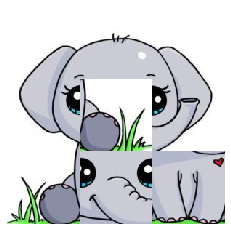

In [23]:
from PIL import Image
from itertools import groupby
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


#https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.crop
#Cara la imagen
imagen1 = Image.open('/content/foto.bmp')
datos_imagen = imagen1.getdata() #Se obtienen los datos
plt.imshow(imagen1)
plt.axis('off') 
print('Size:')
print(datos_imagen.size)
#Se corta la imagen en 9 pedasos
crop1 = datos_imagen.crop((0,0,100,100)) #arriba, derecha,abajo,izquierda
crop2 = datos_imagen.crop((100,0,200,100))
crop3 = datos_imagen.crop((200,0,300,100))
crop4 = datos_imagen.crop((0,100,100,200))
crop5 = datos_imagen.crop((100,100,200,200))
crop6 = datos_imagen.crop((200,100,300,200))
crop7 = datos_imagen.crop((0,200,100,300))
crop8 = datos_imagen.crop((100,200,200,300))
crop9 = datos_imagen.crop((200,200,300,300))
# se crean 9 imagenes nuevas de tamaño del cuadro. Tipo RGB
imagen1 = Image.new('RGB', (100,100))
imagen2 = Image.new('RGB', (100,100))
imagen3 = Image.new('RGB', (100,100))
imagen4 = Image.new('RGB', (100,100))
imagen5 = Image.new('RGB', (100,100))
imagen6 = Image.new('RGB', (100,100))
imagen7 = Image.new('RGB', (100,100))
imagen8 = Image.new('RGB', (100,100))
imagen9 = Image.new('RGB', (100,100)) 
#A cada imagen creada se le da como datos los cortados anteriormente
imagen1.putdata(crop1)
imagen2.putdata(crop2) 
imagen3.putdata(crop3) 
imagen4.putdata(crop4) 
imagen5.putdata(crop5) 
imagen6.putdata(crop6) 
imagen7.putdata(crop7) 
imagen8.putdata(crop8) 
imagen9.putdata(crop9) 
#Se guardan las imagenes en la siguiente ruta
imagen1.save('/content/cuadro1.bmp')
imagen2.save('/content/cuadro2.bmp') 
imagen3.save('/content/cuadro3.bmp') 
imagen4.save('/content/cuadro4.bmp') 
imagen5.save('/content/cuadro5.bmp') 
imagen6.save('/content/cuadro6.bmp') 
imagen7.save('/content/cuadro7.bmp') 
imagen8.save('/content/cuadro8.bmp') 
imagen9.save('/content/cuadro9.bmp') 
  

       


In [15]:
#Crear imagen desordenada a partir de los cuadros cortados
####
###
##
#
picture = Image.new('RGB', (300,300))
picture.paste(imagen1,(0,0))
picture.paste(imagen2,(100,0))
picture.paste(imagen3,(200,0))
picture.paste(imagen4,(0,100))
picture.paste(imagen9,(100,100))
picture.paste(imagen6,(200,100))
picture.paste(imagen7,(0,200))
picture.paste(imagen5,(100,200))
picture.paste(imagen8,(200,200))
picture.save('/content/picture.bmp')
print('Imagen Creada')
#####
####
###
##
#

Imagen Creada


Select to
7
This is v:  [1, 1, 1, 1]
This is c:  [5, 8, 3, 1]
This is euc:  15.580693131022372
[0, 1, 2, 3, 7, 5, 6, 8, 4]
Objetivo final:
Objetivo --> [0, 1, 2, 3, 7, 5, 6, 8, 4]
Objetivo finally:  ['1', '2', '3', '4', '0', '6', '7', '5', '8']


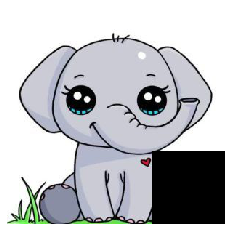

In [27]:
##Comparar pixeles
def comparar(imag1, imag2, opc):
  R = []
  G = []
  B = [] 
  RR = []
  GG = []
  BB = []
  for i in range(100): 
    if(opc == 0): 
      pixel = imag1.getpixel((99,i))
      pixel2 = imag2.getpixel((0,i))
    else:
      if(opc == 1):
        pixel = imag1.getpixel((i,99))
        pixel2 = imag2.getpixel((i,0))
      else:
        if(opc==2):
          pixel = imag1.getpixel((0,i))
          pixel2 = imag2.getpixel((99,i))
        else:
          if(opc==3):
            pixel = imag1.getpixel((i,0))
            pixel2 = imag2.getpixel((i,99))
    #print(pixel)
    #print(pixel2)
    MediaR = (pixel[0]+pixel2[0])/2
    MediaG = (pixel[1]+pixel2[1])/2
    MediaB = (pixel[2]+pixel2[2])/2
    RR.append(np.sqrt(((pixel[0]-pixel2[0])**2+(pixel[1]-pixel2[1])**2+(pixel[2]-pixel2[2])**2)))
   
    R.append(((pixel[0]-MediaR)**2+(pixel2[0]-MediaR)**2)) 
    G.append(((pixel[1]-MediaG)**2+(pixel2[1]-MediaG)**2)) 
    B.append(((pixel[2]-MediaB)**2+(pixel2[2]-MediaB)**2))     
  return R, G, B, RR

im=[imagen1,imagen2,imagen3,imagen4, imagen5, imagen6, imagen7, imagen8, imagen9]
cuadr=['','','','','','','','','']
euc= 40
vari = 200
def encontre(R,G,B,RR, f, c):
  RV=0
  GV=0
  BV=0
  RRR=0
  for M in range(100):
    RV = RV+R[M]
    GV = GV+G[M]
    BV = BV+B[M]  
    RRR=RRR+RR[M]
  #print('imagen',f+1,c+1, k+1)
  #print('Euclidiana',RRR/100)
  #print(RV/100,GV/100,BV/100)    
  if((RV/100)<=vari and (GV/100)<= vari and (BV/100)<=vari or ((RRR/100)<=euc)):        
    #print('Math-------------------------oooooooooooooooooooooooooooo--',f+1,c+1,k+1)
    return 1
  else:
    return 0
sw = 1

while(True):
  for i in range(9):
    math=0
    V=[0,0,0,0]
    C=['','','','']
    eucli=0
    
    for j in range(9):    
      for k in range(4):
        if(j!=i):
          R,G,B,RR = comparar(im[i], im[j],k)
          #print('RR: ',RR)
          RV=0
          GV=0
          BV=0
          RRR=0
          for M in range(100):
            RV = RV+R[M]
            GV = GV+G[M]
            BV = BV+B[M]  
            RRR=RRR+RR[M]
             
          if(((RV/100)<=vari and (GV/100)<= vari and (BV/100)<=vari) or ((RRR/100)<=euc)):         
            math=math+1
            V[k] = 1
            C[k] = j
            eucli = eucli +  RRR/100
            #print('Match-----------------')
    #print('Math: ', math, i, j)
    Veri=['','','','']
    if(math==4 and V[0]==1 and V[1]==1 and V[2]==1 and V[3]==1):
      print('Select to')
      print(i)
      print('This is v: ', V)
      print('This is c: ', C)
      print('This is euc: ', eucli/4)
      if(V[0]==1 and V[1]==1 and V[2]==1 and V[3]==1):
        cuadr[4]=i
        cuadr[5] = C[0]
        cuadr[7] = C[1]
        cuadr[3] = C[2]
        cuadr[1] = C[3]
        for f in range(9):
          if(f !=i and f != C[0] and f != C[1] and f != C[2] and f != C[3]):
          # for h int range(h):
            R,G,B,RR = comparar(im[f], im[C[2]],1)
            R2,G2,B2,RR2 = comparar(im[f], im[C[3]],0)
            if(encontre(R,G,B,RR, f, C[2]) == 1 and encontre(R2,G2,B2,RR2, f, C[3]) == 1):
              cuadr[0] = f            
            R,G,B,RR = comparar(im[f], im[C[3]],2)
            R2,G2,B2,RR2 = comparar(im[f], im[C[0]],1)
            if(encontre(R,G,B,RR, f, C[3]) == 1 and encontre(R2,G2,B2,RR2, f, C[3]) == 1):
              cuadr[2] = f
            R,G,B,RR = comparar(im[f], im[C[2]],3)
            R2,G2,B2,RR2 = comparar(im[f], im[C[1]],0)
            if(encontre(R,G,B,RR, f, C[3]) == 1 and encontre(R2,G2,B2,RR2, f, C[3]) == 1):
              cuadr[6] = f
            R,G,B,RR = comparar(im[f], im[C[1]],2)
            R2,G2,B2,RR2 = comparar(im[f], im[C[0]],3)
            if(encontre(R,G,B,RR, f, C[3]) == 1 and encontre(R2,G2,B2,RR2, f, C[3]) == 1):
              cuadr[8] = f

    

    
    #print('V::: ', V)
    #print('CCCC:', C)
    #print('--------------------')

    


  for i in range(9):
    if(cuadr[i]==''):
     sw=0
  if(sw == 0):
    vari = vari + vari*0.2
    euc = euc + euc*0.2
    print('vvalor: ', euc)
    print(sw)
  else:
    break
print(cuadr)
fin=['','','','','','','','','']  

pictur = Image.new('RGB', (300,300))
pictur.paste(im[cuadr[0]],(0,0))
fin[0]=im[cuadr[0]]
pictur.paste(im[cuadr[1]],(100,0))
fin[1]=im[cuadr[1]]
pictur.paste(im[cuadr[2]],(200,0))
fin[2]=im[cuadr[2]]
pictur.paste(im[cuadr[3]],(0,100))
fin[3]=im[cuadr[3]]
pictur.paste(im[cuadr[4]],(100,100))
fin[4]=im[cuadr[4]]
pictur.paste(im[cuadr[5]],(200,100))
fin[5]=im[cuadr[5]]
pictur.paste(im[cuadr[6]],(0,200))
fin[6]=im[cuadr[6]]
pictur.paste(im[cuadr[7]],(100,200))
fin[7]=im[cuadr[7]]
#pictur.paste(im[cuadr[8]],(200,200))
fin[8]=im[cuadr[8]]
#fin=[group[0] for group in groupby(pictur)]
pictur.save('/content/fin.bmp')
print('Objetivo final:')
plt.imshow(pictur)
plt.axis('off')


print('Objetivo -->', cuadr) 
objetivo = ['','','','','','','','',''] 
for i in range(9):
  objetivo[cuadr[i]] = str(i+1)
  if((i+1) == 9):
    objetivo[cuadr[i]] = '0'

#board = [["","",""],
#          ["","",""],
#          ["","",""]]
#
print('Objetivo finally: ', objetivo)
#cont = 0
#for i in range(3):
#  for j in range(3):
#    if(objetivo[cont] == 9):
#      board[i][j] = 0
#    else:
#      board[i][j] = objetivo[cont]
#    cont += 1
#
#print('board: ', board)

#https://n-puzzle-solver.appspot.com/
#[0 1 2 3 4 5 6 7 8]
#img((finaly[0]-1))

creo que esta puede ser la heuristica d(p,q)=|q1-p1|+|q2-p2|
se llama suma de las distancias de mathattan, dicen que es la heuristica más optima para el problema
(no cambies nada del codigo)





This is the objetivo ['1', '2', '3', '4', '0', '6', '7', '5', '8']
Path: 
state 123406758
['1', '2', '3', '4', '0', '6', '7', '5', '8']
['1', '2', '3', '4', '0', '6', '7', '5', '8']
cuadroooo:  ['1', '2', '3', '4', '0', '6', '7', '5', '8']
akdkad <PIL.Image.Image image mode=RGB size=100x100 at 0x7EFCCDE6B3C8>
ckscksmcks 7
ruta: /content/finn1.bmp
_____________________________
state 123456708
['1', '2', '3', '4', '5', '6', '7', '0', '8']
['1', '2', '3', '4', '5', '6', '7', '0', '8']
cuadroooo:  ['1', '2', '3', '4', '5', '6', '7', '0', '8']
akdkad <PIL.Image.Image image mode=RGB size=100x100 at 0x7EFCCDE6B3C8>
ckscksmcks 7
ruta: /content/finn2.bmp
_____________________________
state 123456780
['1', '2', '3', '4', '5', '6', '7', '8', '0']
['1', '2', '3', '4', '5', '6', '7', '8', '0']
cuadroooo:  ['1', '2', '3', '4', '5', '6', '7', '8', '0']
akdkad <PIL.Image.Image image mode=RGB size=100x100 at 0x7EFCCDE6BE10>
ckscksmcks -1
ruta: /content/finn3.bmp
_____________________________
 123406758

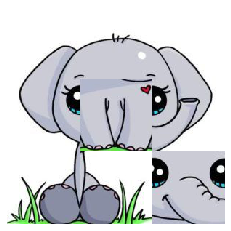

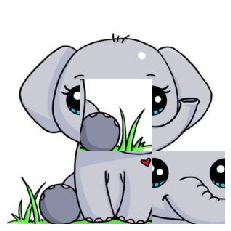

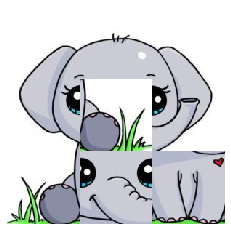

<Figure size 432x288 with 0 Axes>

In [29]:
from _collections import deque
from timeit import default_timer as timer
import copy
import heapq as heap


class Node:
    state_array = []
    position = ''
    depth = 0
    current_path = []

    def __init__(self, state_array, position, depth, current_path=None, heuristic=None):
        self.state_array = state_array
        self.position = position
        
        self.heuristic = heuristic  # A* heuristic
        self.current_path = current_path
def find_open_position(puzzle):
    for i in range(3):  # i = column #, j = row
        for j in range(3):
            if puzzle[i][j] == '0':
                entry = str(i) + str(j)  # Open spot in puzzle
    return entry
GOAL_STATE = [['1', '2', '3'], ['4', '5', '6'], ['7', '8', '0']]


# Solves a puzzle using the Manhattan distance heuristic
# which is total number of moves of each piece from the goal state
def solve_manhattan(puzzle):
    queue = []  # Queue
    visited_states = {}  # Visited_States
    depth = 0
    puzzle = to_2d_array(puzzle)  # Transforms puzzle to 2-d array
    start = timer()  # timer start
    path = [to_string(puzzle)]  # Adds starting state to path
    # Creates origin node
    node = Node(puzzle, find_open_position(puzzle), depth, path, get_manhattan(puzzle))  # Origin state
    visited_states[to_string(node.state_array)] = 1  # adds visited states as an in-order string
    heap.heappush(queue, (node.heuristic, 0, node))  # Adds origin state to queue making it a heap
    temp_tuple = heap.heappop(queue)  # Gets tuple
    node = temp_tuple[2]  # Grabs node from tuple
    solved = True
    #  Loop walks through puzzle and checks if goal state is reached
    while node.state_array != GOAL_STATE:
        children = get_children(node)  # Child States
        for child in children:  # Check for previously visited states
            if to_string(child) in visited_states:
                pass
            elif to_string(child) not in visited_states:
                visited_states[to_string(child)] = 1  # Adds new state to visited states
                new_path = copy.deepcopy(node.current_path)  # Creates a new path and adds itself to the path
                new_path.append(to_string(child))  # Creates a new node
                new_node = Node(child, find_open_position(child), node.depth + 1, current_path=new_path,
                                heuristic=get_manhattan(child) + node.depth + 1)
                heap.heappush(queue, (new_node.heuristic, len(visited_states), new_node))  # Pushes onto heap                
        if queue:  # Queue is not empty
            node = heap.heappop(queue)
            node = node[2]
        else:  # Queue is empty and goal state not achieved
            print(" ")
            print("Sorry, puzzle not solvable!")
            print(" ")
            solved = False
            break

    end = timer()
    time = end - start
    if solved:
        print("Path: ")
        path = ""
        cont = 0
        for state in node.current_path:
            path = path+" "+state
            print('state', state)
            convert(state)
            cont +=1
            create_images(convert(state), cont)
            print('_____________________________')
        print(path)

       
        print("----------------")
        print("A* Misplaced tile solution found in: " + str(time) + " seconds at " + str(node.depth) + " depth")
        print('Nodes explored: ' + str(len(visited_states)))
        print("  ")

    else:
        print("A* # Moves Search took: " + str(time) + " seconds, and explored " + str(len(visited_states)) + " nodes.")
        print(" ")


# Function returns the current manhattan distance
def get_manhattan(state):
    manhattan = 0  # Total # of misplaced tiles by Steps
    for x in range(3):
        for y in range(3):
            current = int(state[x][y])  # Value of tile
            if current != 0:
                xtarget = (current - 1) // 3  # Gets target location of
                ytarget = (current - 1) % 3
                dx = x - xtarget
                dy = y - ytarget
                manhattan += abs(dx) + abs(dy)
    return manhattan


# Returns position heuristic for puzzle pieces not in
# Goal State location
def get_position(state):
    position = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != heuristic_position[str(i) + str(j)]:
                position += 1
    return position


# Prints puzzle for output format


# Gets child node positions of the current state
# Takes the current state as parameter
# Returns a list of future states aka children from current state
def get_children(node):
    state = node.state_array
    children = []  # List of possible moves after
    possible_moves = []  # Temp List of possible moves
    r = int(node.position[0])  # Row
    c = int(node.position[1])  # Column

    if r == 0 and c == 0:
        possible_moves.append('01')
        possible_moves.append('10')
    elif r == 0 and c == 1:  # Puzzle slots: RC
        possible_moves.append('00')  # 00 01 02
        possible_moves.append('02')  # 10 11 12
        possible_moves.append('11')  # 20 21 22

    elif r == 0 and c == 2:
        possible_moves.append('01')
        possible_moves.append('12')

    elif r == 1 and c == 0:  # Puzzle slots: RC
        possible_moves.append('00')  # 00 01 02
        possible_moves.append('11')  # 10 11 12
        possible_moves.append('20')  # 20 21 22

    elif r == 1 and c == 1:
        possible_moves.append('01')
        possible_moves.append('10')
        possible_moves.append('12')
        possible_moves.append('21')

    elif r == 1 and c == 2:  # Puzzle slots: RC
        possible_moves.append('02')  # 00 01 02
        possible_moves.append('22')  # 10 11 12
        possible_moves.append('11')  # 20 21 22

    elif r == 2 and c == 0:
        possible_moves.append('10')
        possible_moves.append('21')

    elif r == 2 and c == 1:  # Puzzle slots: RC
        possible_moves.append('20')  # 00 01 02
        possible_moves.append('11')  # 10 11 12
        possible_moves.append('22')  # 20 21 22

    elif r == 2 and c == 2:
        possible_moves.append('21')
        possible_moves.append('12')

    for move in possible_moves:
        children.append(slide_tiles(state, node.position, move))
    return children


# Converts puzzle from string to 2D array
def to_2d_array(puz):
    puzzle = [['0', '0', '0'], ['0', '0', '0'], ['0', '0', '0']]
    count = 0
    for i in range(3):
        for j in range(3):
            puzzle[i][j] = puz[count]
            count += 1
    return puzzle


# Received state and generates a new state by
# Sliding the tiles from move into open space 'Current'
def slide_tiles(state, current, move):
    temp_state = copy.deepcopy(state)

    # Swaps the tiles in a very smooth way
    temp_state[int(current[0])][int(current[1])], temp_state[int(move[0])][int(move[1])] = \
        temp_state[int(move[0])][int(move[1])], temp_state[int(current[0])][int(current[1])]
    return temp_state


# Converts 2-d array into string
def to_string(puz):
    state = ''
    for i in range(3):
        for j in range(3):
            state = state + puz[i][j]
    return state

# Generates a puzzle
def generate_puzzle():
    puzzle = []
    while len(puzzle) < 9:
        num = random.randint(0, 8)
        if str(num) not in puzzle:
            puzzle.append(str(num))
    return puzzle


# This function was adapted from:

# Used for testing purposes
def is_solvable(puzzle):
    inversions = 0
    for i in range(len(puzzle)):
        for j in range(1, len(puzzle)):
            if puzzle[i] > puzzle[j]:
                inversions += 1
        if puzzle[i] == 0 and i % 2 == 1:
            inversions += 1
    return inversions % 2 == 0

def convert(state):
  puzzle = ['0', '0', '0', '0', '0', '0', '0', '0', '0']
  for i in range(9):
    puzzle[i] = state[i:i+1]            
  print(puzzle) 
  return puzzle

def create_images(cuadro,cont):
  pictures = Image.new('RGB', (300,300))
  print('cuadroooo: ', cuadro)
  print('akdkad', im[int(cuadro[8])-1])
  print('ckscksmcks', int(cuadro[8])-1)
  pictures.paste(im[int(cuadro[0])-1],(0,0))
  pictures.paste(im[int(cuadro[1])-1],(100,0))
  pictures.paste(im[int(cuadro[2])-1],(200,0))
  pictures.paste(im[int(cuadro[3])-1],(0,100))
  pictures.paste(im[int(cuadro[4])-1],(100,100))
  pictures.paste(im[int(cuadro[5])-1],(200,100))
  pictures.paste(im[int(cuadro[6])-1],(0,200))
  pictures.paste(im[int(cuadro[7])-1],(100,200))
  pictures.paste(im[int(cuadro[8])-1],(200,200))
  ruta = '/content/finn'+str(cont)+'.bmp'
  print('ruta:', ruta)
  pictures.save(ruta)
  plt.imshow(pictures)
  plt.axis('off')
  plt.figure()
  

if __name__ == "__main__":
    #puzzle = [4, 0, 3, 1, 5, 7, 8, 6, 2]
    print('This is the objetivo', objetivo)
    solve_manhattan(objetivo)    
    pass